<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [2]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [3]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [4]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "car_price_dataset.csv")

---


# Test Environment


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
%matplotlib inline

<ipython-input-5-fa5678fd734e>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Import the Dataset:

In [6]:
# Import the data:
# Task 1: Read the CSV file from the URL into a pandas DataFrame
# Use the read_csv function and set header as 0 to indicate that the first row should be used as headers
df = pd.read_csv("./car_price_dataset.csv", header=0)

# Task 2: Print the first 5 rows of the dataframe
print(df.head())

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


#### Here the prompt is not able to distinguish how the csv data in the local computer. Even if I have mentioned how I have saved the data, then tell it to import the datatset it is not bale to give the correct code. 

### Data Insights and Visualization:

In [7]:
#Data cleaning or preparation:
# Task 1: Identify columns with missing values
missing_values = df.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

# Task 2: Replace missing values with the mean of the column
# Identify numerical columns for mean imputation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)
    
# Task 3: Delete duplicate entries
df.drop_duplicates(inplace=True)

# Verify the changes (print few rows of the modified dataframe)
print("\nFirst 5 rows after handling missing values and removing duplicates:\n", df.head())

Columns with missing values:
 tax    3
dtype: int64


<ipython-input-7-e55390100cad>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)



First 5 rows after handling missing values and removing duplicates:
      model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


#### 1) Identify the 5 attributes that have the highest correlation with the `price` parameter.

In [31]:
def top_correlated_features(df, target_attribute):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Calculate correlation matrix with target
    corr_matrix = numeric_df.corr()[target_attribute].sort_values(ascending=False)
    
    # Get the top 5 most correlated features
    top_5_corr = corr_matrix[1:6]
    
    print("Top 5 numeric features most correlated with the target attribute '", target_attribute, "':")
    print(top_5_corr)
    
    return top_5_corr

In [32]:
#check the function:
# Example usage
target_attribute = 'price'  # assuming 'Price' is the target column
top_5_numeric_features = top_correlated_features(df, target_attribute)

Top 5 numeric features most correlated with the target attribute ' price ':
year          0.635715
engineSize    0.411451
tax           0.405970
mpg          -0.346263
mileage      -0.530483
Name: price, dtype: float64


**The top feature is `year` in terms of correlation with the price. Makes sense the year the car was made to be correlated with the price. The code that was initially generated was needlessly complicated with a while loop and it was not necessary. Then had to modify `corr_matrix[:5]` to `corr_matrix[1:6]`, because the first entry was correlation of `price` with itself.**

#### 2) Count the number of cars under each unique value of `fuelType` attribute.

In [33]:
target_attribute = 'fuelType'
fueltype_counts = df[target_attribute].value_counts()
print("Number of car entries by each unique fueltype:\n", fueltype_counts)

Number of car entries by each unique fueltype:
 fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


**Had to modify the code that was generated, because there was typos even though the prompt was specific.**

#### 3) Create a Box plot to determine whether cars with automatic, manual or semi-auto type of `transmission` have more `price` outliers. Use the Seaborn library for creating the plot.

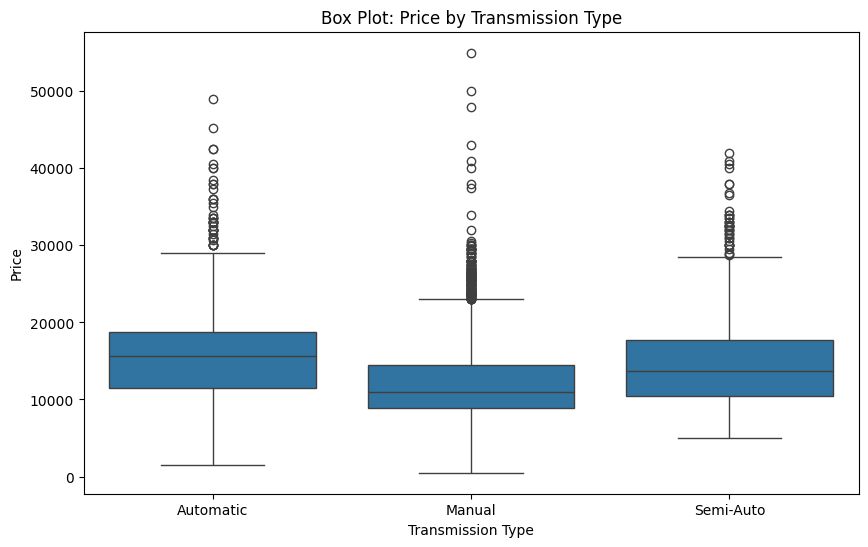

In [34]:
# Create Seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)

# Customize plot title and labels
plt.title('Box Plot: Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')

# Show plot
plt.show()

#### 4) Generate the regression plot between `mpg` parameter and the `price` to determine the correlation type between the two.

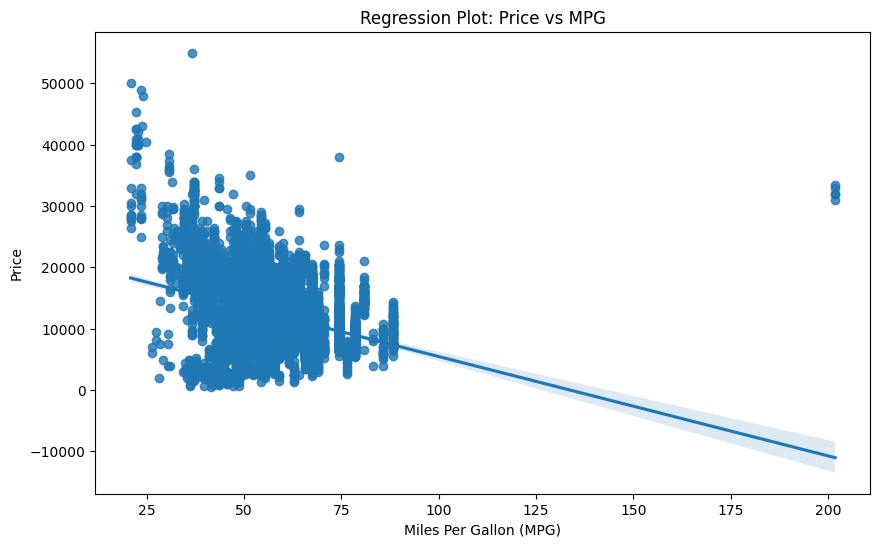

In [35]:
#Create Seaborn regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='mpg', y='price', data=df)

# Customize plot title and labels
plt.title('Regression Plot: Price vs MPG')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Price')

# Display plot
plt.show()

### Model Development and Evaluation:

#### 1) Fit a linear regression model to predict the `price` using the feature `mpg`. Then calculate the R^2 and MSE values for the model.

In [37]:
#set up linear regression model with one feature ('mpg') on target variable ('price'):
# Prepare data
X = df[['mpg']]
y = df[['price']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.4f}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

R^2 Score: 0.1504
Mean Squared Error (MSE): 19049855.1401


#### 2) Fit a linear regression model to predict the `price` using the following set of features: `year, mileage, tax, mpg and engineSize`.

In [38]:
# Step 2: Prepare the features and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Compute R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R^2 Score: 0.6917
Mean Squared Error: 6912744.9107


**This has done better than the previous q1) linear regression with only  one feature. This makes sense, because in q2) we are using the linear regresion model with the top 5 features we found earlier.**

#### 3) For the same set of features as in the question above, create a pipeline model object that uses standard scalar, second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.

In [39]:
# Prepare the features and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step to scale the features
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Generate polynomial and interaction features
    ('linear_regression', LinearRegression())  # Use a linear regression model
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"R^2 Score for Polynomial Pipeline: {r2:.4f}")
print(f"Mean Squared Error for Polynomial Pipeline: {mse:.4f}")

R^2 Score for Polynomial Pipeline: 0.1212
Mean Squared Error for Polynomial Pipeline: 19704749.6149


**Interestingly, the polynomial regression doesn't do that well. This could be because the degree is not appropriate.**

#### 4) For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

In [41]:
# Prepare the features and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Ridge Regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

# Calculate MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"MSE for Ridge Regression (alpha=0.1): {mse:.4f}")
print(f"R^2 for Ridge Regression (alpha=0.1): {r2:.4f}")

MSE for Ridge Regression (alpha=0.1): 6912725.8011
R^2 for Ridge Regression (alpha=0.1): 0.6917


**The ridge regression does better, than the polynomial regression we used in q3).**

#### 5) Perform a second order polynomial transform on both the training data and testing data created for the question above. Create and fit a Ridge regression object using the modified training data, set the regularisation parameter to 0.1, and calculate the R^2 and MSE utilising the modified test data.

In [42]:
# Prepare the features and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial features transformation (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit the Ridge Regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Make predictions on the testing set with polynomial features
y_pred = ridge_model.predict(X_test_poly)

# Calculate MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"MSE for Ridge Regression (alpha=0.1, polynomial features): {mse:.4f}")
print(f"R^2 for Ridge Regression (alpha=0.1, polynomial features): {r2:.4f}")

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.1777e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MSE for Ridge Regression (alpha=0.1, polynomial features): 7326174.5165
R^2 for Ridge Regression (alpha=0.1, polynomial features): 0.6733


**This does slightly worse, than just the ridge regression performed in q4).**

#### 6) In the question above, perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross validation to find the optimum value of alpha to be used for the prediction model.

In [49]:
# Prepare the features and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial features transformation (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Create a Ridge regression model
ridge = Ridge()

# Initialize GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=4, scoring='r2')

# Fit GridSearchCV with the transformed training data
grid_search.fit(X_train_poly, y_train)

# Best model found by GridSearchCV
best_ridge = grid_search.best_estimator_
best_score = grid_search.best_score_
# Make predictions on the testing set with polynomial features and the best alpha
y_pred = best_ridge.predict(X_test_poly)

# Calculate MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Best Alpha: {grid_search.best_params_['alpha']:.4f}")
print(f"MSE for Ridge Regression (best alpha): {mse:.4f}")
print(f"""
R^2 using r2_score() function to see its' actual score based on the predicted values: 
for Ridge Regression (best alpha): {r2:.4f}""")
print(f"best score from th hypertuning on the training data: {best_score}")

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.9414e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.88152e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.01288e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.77866e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.91457e-23): resu

Best Alpha: 0.1000
MSE for Ridge Regression (best alpha): 7326174.5165

R^2 using r2_score() function to see its' actual score based on the predicted values: 
for Ridge Regression (best alpha): 0.6733
best score from th hypertuning on the training data: 0.7694791277690672


**The performance (i.e. score) with 4 cv folds polynomial and ridge regresssion for q6) is still pretty much the same as the score for q5)**
**In fact, the simpler case in q4) where we jist run a ridge regression without a polynomial regressio yield a higher $r^2$ score.**

### My comments:
----
#### Practicing with Gen AI:
In this script for the final project, we are practicing how generative AI prompts work, such that it can generate code according to your needs. This final project combines all the prompt skills we used for all the previous labs into one assignment.

In this example, we try to use it for ML Model development from a given dataset to make this process quicker and more efficient. We try to get insights with statistical descriptions, correlative insights, some plottting using Gen AI prompts, and along with different Ml model scenario comparsions.

The AI generated code is written based on specific prompts that were given to it by me, based on the instructions specified in the lab:

**Examples of The prompts that were given to the AI (IBM Granite 3.2 8B(Reasoning)):**

**Prompt Instructions:**
```
The data set is in this
`URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"`.
Import this data save it as a file called "car_price_dataset.csv" . Then save this .csv file as a dataframe called "df".
```

**prompt 1:**

```
Write a Python code that can perform the following tasks.
1. Read the CSV file, located on a given file path, into a pandas data frame, assuming that the first row of the file can be used as the headers for the data.
2. Print the first 5 rows of the dataframe to verify correct loading.
```

**prompt 2:** 
```
Write a python code that performs the following tasks:
1. Identify the columns of a data frame with missing values.
2. Replace the missing values thus identified with mean value of the column.
3. Deletes the duplicate entries from the data frame.
```

**prompt 3:**
```
Write a python code that identifies the top 5 attributes with highest correlation with the target attribute in a data frame. exclude non numeric columns
```
**prompt 4:**
```
Write a python code that counts the number of car entries in a dataframe with each unique value of 'fueltype' attribute.
```
**prompt 5:**
```
Write a python code that creates a Seaborn box plot between a source (transmission) and target attributes  ('price') of a dataframe.
```
**prompt 6:**
```
Write a python code that creates a regression plot between a source attribute ('mpg') and a target attribute ('price').
```

**prompt 7:**
```
Write a python code to fit a linear regression model on a target variable ('price') on basis of a source variable ('mpg'). Calculate the R^2 values and MSE values for this model.
```

**prompt 8:**
```
Write a python code to fit a linear regression model on a target variable ('price') on basis of a set of source variables (year, mileage, tax, mpg and engineSize). Calculate the R^2 values and MSE values for this model.
```

**prompt 9:**
```
Write a python code that can perform the following tasks.
1. Create a pipeline with standard scalar, second degree polynomial features and linear regression model.
2. Fit this pipeline for a target variable (price) using a set of source attributes (year, mileage, tax, mpg and engineSize) from a dataframe.
3. Evaluate the R^2 and MSE values for the trained model.
```

**prompt 10:**
```
Write a python code that can perform the following tasks.

1. Assuming that a subset of the attributes of a data frame are source attributes (year, mileage, tax, mpg and engineSize) and one of the attributes is a target attribute (price), split the data into training and testing data assuming the testing data to be 20%.
2. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
3. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.
```

**prompt 11:**
```
Write a python code that can perform the following tasks.

1. Assuming that a subset of the attributes of a data frame are source attributes (year, mileage, tax, mpg and engineSize) and one of the attributes is a target attribute (price), split the data into training and testing data assuming the testing data to be 20%.
2. Apply second degree polynomial scaling to the training and testing data.
3. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.
```

**prompt 12:**
```
Write a python code that can perform the following tasks.

1. Assuming that a subset of the attributes of a data frame are source attributes (year, mileage, tax, mpg and engineSize) and one of the attributes is a target attribute (price), split the data into training and testing data assuming the testing data to be 20%.
2. Apply second degree polynomial scaling to the training and testing data.
3. Create and fit a Grid search on Ridge regression with cross validation using the training data, for a set of values of the parameter alpha.
4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.
```

#### Overall, It does the job well enough for the example or the tasks required for this lab.
#### But unlike the other labs, in this one there were the odd typos that were generated in the response that had to be corrected. I don't know the exact reason for this, maybe the prompts I supplied to it was not clear enough.

----

## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
